<a href="https://colab.research.google.com/github/Anastasia6194/google_play_store_apps_analysis/blob/master/Google_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Google Play Store data


Number of categories = 33


Categories sorted by the number of apps:
family                 1832
game                    959
tools                   827
business                420
medical                 395
personalization         376
productivity            374
lifestyle               369
finance                 345
sports                  325
communication           315
health_and_fitness      288
photography             281
news_and_magazines      254
social                  239
books_and_reference     222
travel_and_local        219
shopping                202
dating                  171
video_players           163
maps_and_navigation     131
education               119
food_and_drink          112
entertainment           102
auto_and_vehicles        85
libraries_and_demo       84
weather                  79
house_and_home           74
art_and_design           64
events                   64
parenting                60
comics                   5

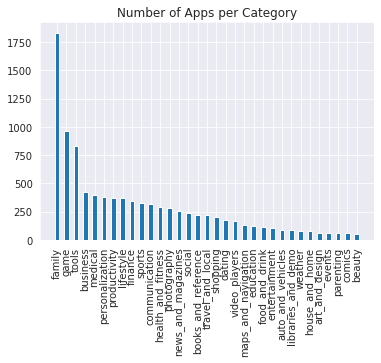

6 Categories contribute to almost 50% of all apps in Google Play Store:family,game,tools,business,medical,personalization




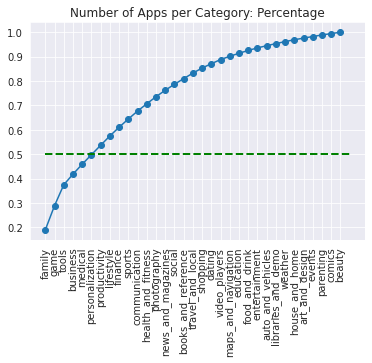

Categories sorted by the number of installs




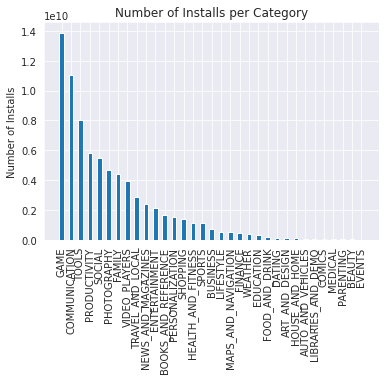



Analysis of Ratings


Average app rating is 4.17


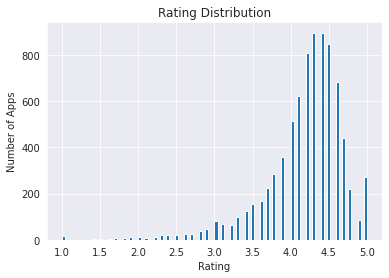

Apps Analysis


Apps with the largest number of installs: 
Subway Surfers
Google Play Books
Skype - free IM & video calls
Google
Google Chrome: Fast & Secure
Google Drive
Instagram
Google News
Google Photos
Google Play Movies & TV
YouTube
Google Street View
Google+
Facebook
Messenger – Text and Video Chat for Free
WhatsApp Messenger
Hangouts
Maps - Navigate & Explore
Gmail
Google Play Games


App with the biggest number of reviews: GollerCepte Live Score


Free vs Paid Apps Analysis




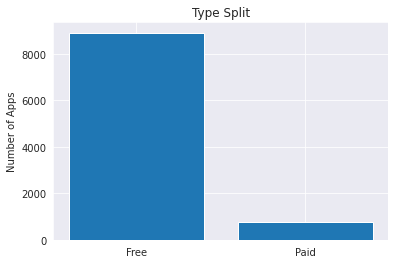

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_duplicates = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/googleplaystore.csv')

#Drop dublicates
apps_dirty = apps_with_duplicates.drop_duplicates(subset = 'App')


#Drop bad data
apps = apps_dirty[apps_dirty['Category']!='1.9']

#Data cleaning

chars_to_remove = [',','+','M','$']
cols_to_clean = ['Price','Size','Installs']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col], errors='coerce')


#Categories with largest number of apps
unique_categories = len(
    apps['Category'].unique()
    )

print('Analysis of Google Play Store data')
print('\n')
print('Number of categories = '+ str(unique_categories))
print('\n')

categories_lower = apps['Category'].str.lower()

#Categories sorted by the number of apps in each:
categories = categories_lower.value_counts().sort_values(ascending = False)
print('Categories sorted by the number of apps:')
print(categories)
print('\n')

#Percentage split per category:
categories_pp = categories_lower.value_counts(normalize=True).sort_values(ascending = False)
categories_cumsum=categories_pp.cumsum()

#Graph
x = categories.index
y = categories.values

plt.bar(x,y, width=0.5)
plt.xticks(rotation = 'vertical')
plt.title('Number of Apps per Category')
plt.show()

print('6 Categories contribute to almost 50% of all apps in Google Play Store:'+ ',' .join(categories_cumsum.index[0:6]))

print('\n')

x = categories_cumsum.index
y = categories_cumsum.values

plt.plot(x,y, marker = 'o' )
plt.xticks(rotation = 'vertical')
plt.title('Number of Apps per Category: Percentage')
plt.plot([0, 33], [0.5, 0.5], linestyle = 'dashed', color = 'green', lw=2)
plt.show()


#Categories with largest number of installs
print('Categories sorted by the number of installs')
print('\n')
categories_by_installs = apps.groupby('Category')['Installs'].sum() 
categories_installs_sorted = categories_by_installs.sort_values(ascending = False)

#Graph
x = categories_installs_sorted.index
y = categories_installs_sorted.values

plt.bar(x,y, width=0.5)
plt.title('Number of Installs per Category')
plt.ylabel('Number of Installs')
plt.xticks(rotation = 'vertical')
plt.show()
print('\n')
#Ratings Analysis
print('Analysis of Ratings')
print('\n')
avg_app_rating = round(apps['Rating'].mean(),2)
print("Average app rating is "+ str(round(apps['Rating'].mean(),2)))

plt.hist(apps['Rating'], bins=100, range=[1,5])
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Rating Distribution')
plt.show()


#Apps Analysis
# Top Installs
print('Apps Analysis')
print('\n')

apps_by_installs = apps.groupby('App')['Installs'].sum()
apps_by_installs_sorted = apps_by_installs.sort_values(ascending= False)

top_apps = apps_by_installs_sorted.index[apps_by_installs_sorted ==1000000000]
print('Apps with the largest number of installs: '+ '\n' + '\n'.join(top_apps))
print('\n')


#Top Reviews
apps_by_reviews = apps.groupby('App')['Reviews'].sum()
apps_by_reviews_sorted = apps_by_reviews.sort_values(ascending = False)
top_app = apps_by_reviews_sorted.index[0]
print('App with the biggest number of reviews: '+ str(top_app) )
print('\n')


#Free vs Paid Apps
print('Free vs Paid Apps Analysis')
print('\n')

free_apps_count = apps['App'][apps['Type'] == 'Free'].count()
paid_apps_count = apps['App'][apps['Type'] == 'Paid'].count()
x=['Free', 'Paid']
y = [free_apps_count,paid_apps_count]
plt.bar(x,y)
plt.title('Type Split')
plt.ylabel('Number of Apps')

plt.show()



Analysis of large categories


No correlation between the size and the rating. 
No correlation between the price and the rating either but we found some expensive outliers.


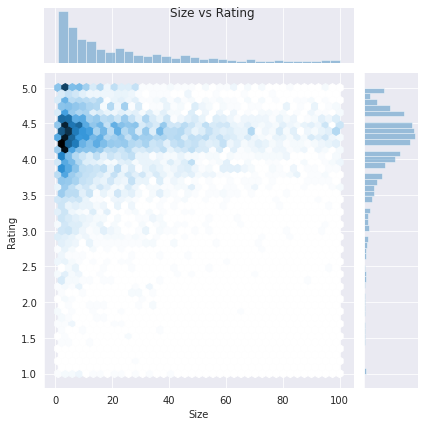

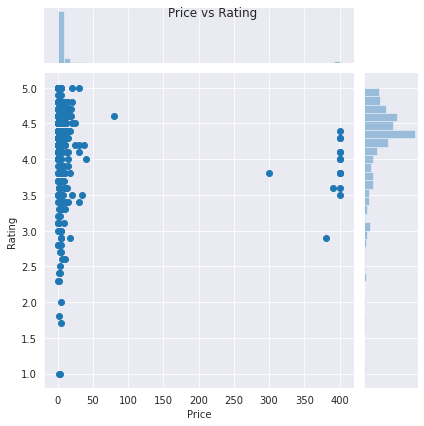

In [53]:
print('Analysis of large categories')

large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

print('\n')
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex').fig.suptitle('Size vs Rating')

#Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']


# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating']).fig.suptitle('Price vs Rating')

print('No correlation between the size and the rating. ' + '\n' + 'No correlation between the price and the rating either but we found some expensive outliers.')



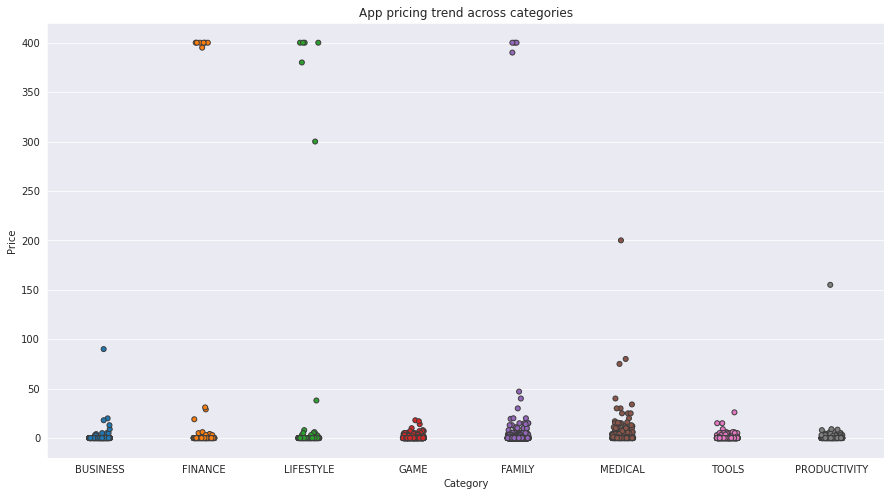

In [54]:
popular_app_cats=apps[apps['Category'].isin(['GAME', 'FAMILY', 'PERSONALISATION', 'PRODUCTIVITY',
                                             'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x=popular_app_cats['Category'], y=popular_app_cats['Price'],data = apps,
                   jitter=True, linewidth=1).set(title='App pricing trend across categories')





Examine expensive apps


       Category                                App   Price
4197     FAMILY             most expensive app (H)  399.99
4362  LIFESTYLE                         💎 I'm rich  399.99
4367  LIFESTYLE           I'm Rich - Trump Edition  400.00
5351  LIFESTYLE                          I am rich  399.99
5354     FAMILY                     I am Rich Plus  399.99
5355  LIFESTYLE                      I am rich VIP  299.99
5356    FINANCE                  I Am Rich Premium  399.99
5357  LIFESTYLE                I am extremely Rich  379.99
5358    FINANCE                         I am Rich!  399.99
5359    FINANCE                 I am rich(premium)  399.99
5362     FAMILY                      I Am Rich Pro  399.99
5364    FINANCE     I am rich (Most expensive app)  399.99
5366     FAMILY                          I Am Rich  389.99
5369    FINANCE                          I am Rich  399.99
5373    FINANCE                 I AM RICH PRO PLUS  399.99
9917    FINANCE              

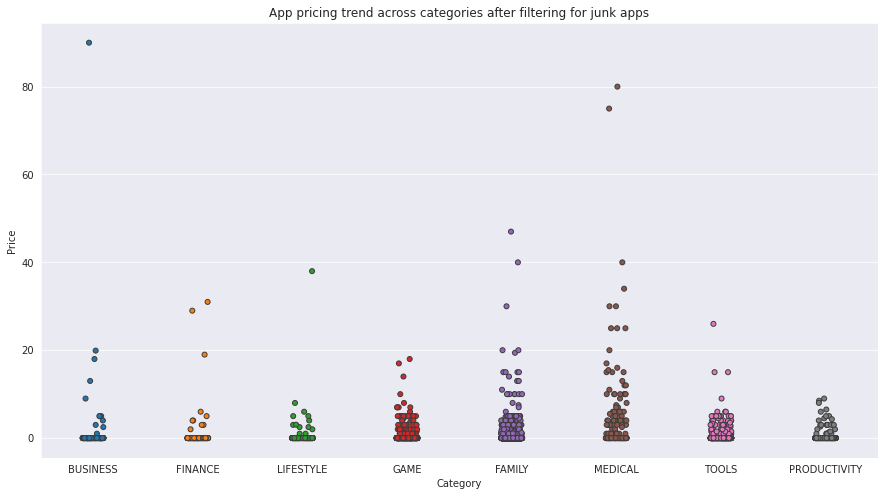

In [55]:
# Examine expensive apps
print('\n')
print('Examine expensive apps')
print('\n')

apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]

print(apps_above_200)
print('\n')
print('Clearly, these expensive apps are fraud. Further analysis will be done without these apps.')
print('\n')


apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Category'], y=apps_under_100['Price'],data = apps,
                   jitter=True, linewidth=1).set(title='App pricing trend across categories after filtering for junk apps')

Paid apps do not have extremely negative reviews. Mean for paid is a little higher than for free apps




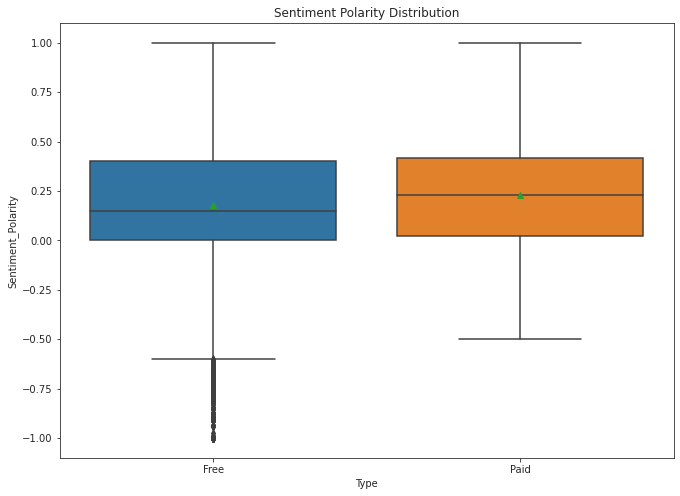

In [58]:
# Load user_reviews.csv
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df, showmeans = True).set(title='Sentiment Polarity Distribution')

print('Paid apps do not have extremely negative reviews. Mean for paid is a little higher than for free apps')
print('\n')